In [194]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
import emcee
from scipy import stats
import corner
from astropy import units as u
from astropy.coordinates import SkyCoord

import ModelDefinitions as MD
import LogProb as LP
from const import *
from TRIS_vals import *
from multifreq_data import *

import importlib
importlib.reload(LP)
importlib.reload(MD)

<module 'ModelDefinitions' from '/Users/vikram/Projects/radioBackground/radio-background/ModelDefinitions.py'>

In [221]:
modelprobs = np.array([LP.multifreq])
outfiles = np.array(['multifreq.npz'])
#R_disk, h_disk, j_disk, a_disk, R_halo, j_halo, a_halo, T_1420, T_820, T_600, T_408, T_150
param_inits = np.array([3., 1., (-40.39), 0.7, 2., (-41.61), 0.9, 0.3, 1, 3, 10., 30.])
priors_lower = np.array([1., 0., (-45), 0., 1., (-45),0., 0., 0., 0., 0., 0.])
priors_upper = np.array([10., 3., (-40), 1., 10., (-40), 1., 50., 50., 50., 50., 50.])

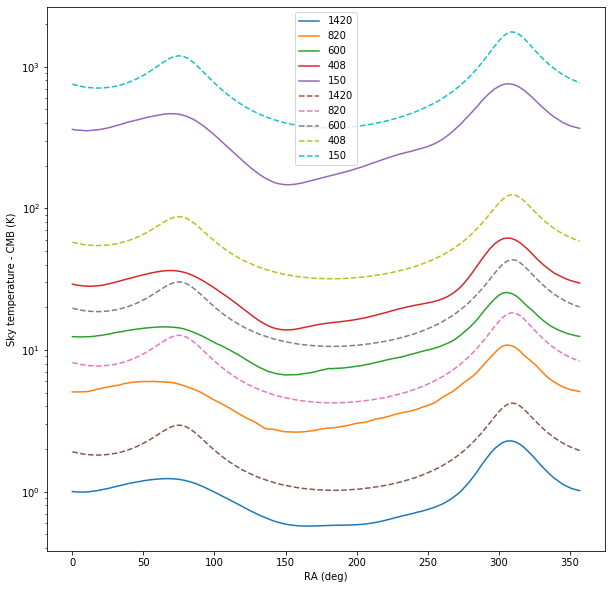

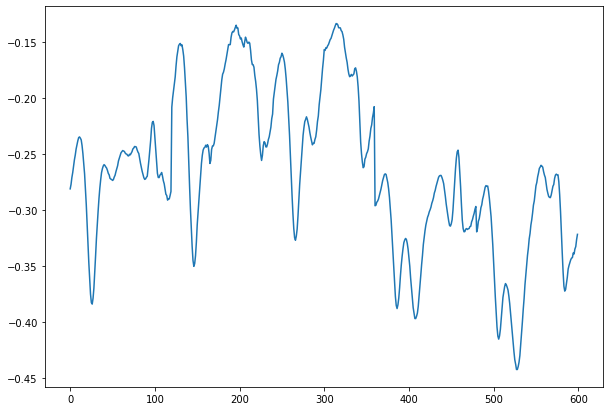

45.32226480325431


In [222]:
# visualise initial params

d0 = LP.return_stuff(param_inits)
coords = SkyCoord(l*u.degree,b*u.degree,frame='galactic')
ras = coords.icrs.ra.deg

plt.figure(figsize=(10,10))
plt.semilogy(ras,d0[0][0],label='1420')
plt.semilogy(ras,d0[1][0],label='820')
plt.semilogy(ras,d0[2][0],label='600')
plt.semilogy(ras,d0[3][0],label='408')
plt.semilogy(ras,d0[4][0],label='150')
plt.xlabel('RA (deg)')
plt.ylabel('Sky temperature - CMB (K)')
#plt.legend()

#plt.figure(figsize=(10,10))
plt.semilogy(ras,d0[0][1],'--',label='1420')
plt.semilogy(ras,d0[1][1],'--',label='820')
plt.semilogy(ras,d0[2][1],'--',label='600')
plt.semilogy(ras,d0[3][1],'--',label='408')
plt.semilogy(ras,d0[4][1],'--',label='150')
#plt.xlabel('RA (deg)')
#plt.ylabel('Sky temperature - CMB (K)')
plt.legend()

plt.figure(figsize=(10,7))
plt.plot(LP.resid(param_inits))
plt.show()

print(np.sum(LP.resid(param_inits)**2.))



In [223]:
# minimization of parameters
from scipy.optimize import least_squares
bounds = (priors_lower,priors_upper)
res_1 = least_squares(LP.resid,param_inits,loss='linear',verbose=2,bounds=bounds,xtol=None)
print(res_1.x)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.2661e+01                                    5.68e+02    
       1              2         1.8369e+00      2.08e+01       3.15e-01       5.90e+01    
       2              3         1.4258e+00      4.11e-01       5.60e-02       3.28e+01    
       3              4         1.1143e+00      3.12e-01       6.27e-01       1.07e+01    
       4              6         8.3522e-01      2.79e-01       1.07e+00       7.60e+00    
       5              7         6.7190e-01      1.63e-01       1.46e+00       5.64e-01    
       6              8         4.9384e-01      1.78e-01       2.53e+00       1.24e+01    
       7             11         4.6094e-01      3.29e-02       1.46e-01       4.62e+00    
       8             12         4.4457e-01      1.64e-02       2.53e-01       1.69e+01    
       9             13         4.1254e-01      3.20e-02       8.22e-01       1.43e+00    

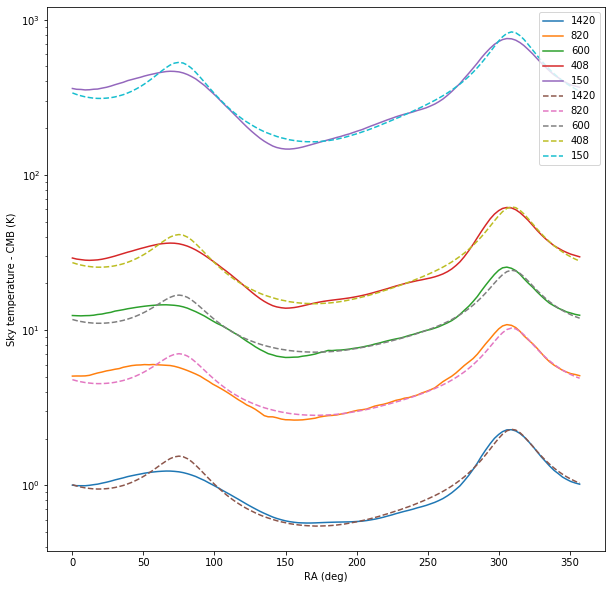

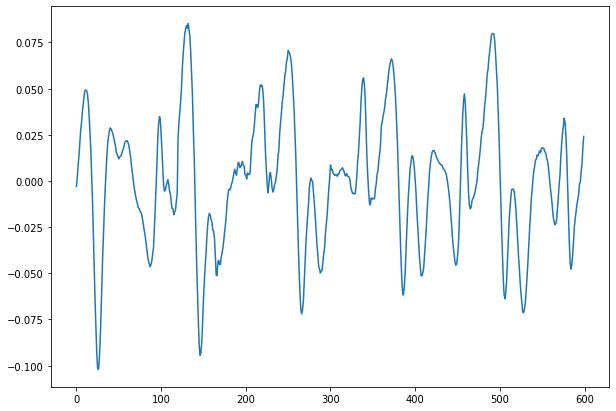

In [224]:
d0 = LP.return_stuff(res_1.x)
coords = SkyCoord(l*u.degree,b*u.degree,frame='galactic')
ras = coords.icrs.ra.deg

plt.figure(figsize=(10,10))
plt.semilogy(ras,d0[0][0],label='1420')
plt.semilogy(ras,d0[1][0],label='820')
plt.semilogy(ras,d0[2][0],label='600')
plt.semilogy(ras,d0[3][0],label='408')
plt.semilogy(ras,d0[4][0],label='150')
plt.xlabel('RA (deg)')
plt.ylabel('Sky temperature - CMB (K)')
#plt.legend()

#plt.figure(figsize=(10,10))
plt.semilogy(ras,d0[0][1],'--',label='1420')
plt.semilogy(ras,d0[1][1],'--',label='820')
plt.semilogy(ras,d0[2][1],'--',label='600')
plt.semilogy(ras,d0[3][1],'--',label='408')
plt.semilogy(ras,d0[4][1],'--',label='150')
#plt.xlabel('RA (deg)')
#plt.ylabel('Sky temperature - CMB (K)')
plt.legend()

plt.figure(figsize=(10,7))
plt.plot(res_1.fun)
plt.show()
